# Table of Content

1. Background
2. Problem Identification
3. Data Source
4. Import Libraries
5. Reading Data
6. Statistical Information about the Data
7. Data Cleansing
8. Exploratory Data Analyst (EDA)
9. Conclusion & Recommendation

# 1. Background

Dalam era kompetitif industri ritel, pemahaman yang mendalam terhadap tren penjualan dan pola perilaku pelanggan menjadi kunci utama untuk mencapai kesuksesan bisnis. Dengan data penjualan yang kaya akan informasi, perusahaan dapat mengidentifikasi peluang untuk meningkatkan efisiensi operasional, memperkuat hubungan dengan pelanggan, dan mengoptimalkan strategi pemasaran. 

Analisis menyeluruh tentang penjualan tidak hanya mencakup evaluasi performa produk dan wilayah penjualan, tetapi juga mempertimbangkan faktor-faktor seperti keuntungan, diskon, dan metode pengiriman yang digunakan. Dari sinilah, perusahaan dapat merumuskan langkah-langkah strategis yang tepat untuk memperkuat posisinya di pasar dan meningkatkan profitabilitasnya. Dengan demikian, memahami data penjualan menjadi fondasi yang kuat untuk mengarahkan keputusan bisnis yang efektif dan efisien.

# 2. Problem Identification

a. Penjualan
- Berapa jumlah total penjualan di setiap kategori produk?
- Berapa total keuntungan yang dihasilkan dari penjualan di wilayah Selatan?
- Berapa persentase perbandingan total keuntungan yang dihasilkan dari semua wilayah?
- Bagaimana pertumbuhan penjualan dari tahun ke tahun, apakah ada peningkatan atau penurunan yang signifikan?
- Adakah bulan yang menunjukkan penurunan signifikan dalam penjualan di tahun 2018?

b. Pelanggan
- Siapa pelanggan yang melakukan pembelian tertinggi (dilihat dari jumlah penjualan) dan detail pembelian mereka apa saja?
- Di antara pelanggan yang terdaftar, siapa yang melakukan pembelian terbanyak (dilihat dari jumlah barang yang dibeli) dan detail pembelian mereka apa saja?
- Bagaimana distribusi segmen pelanggan dalam data?

c. Metode Pengiriman
- Berapa jumlah pesanan yang dikirim menggunakan metode pengiriman "Second Class"?

d. Diskon dan Keuntungan
- Berapa persentase diskon rata-rata yang diberikan untuk setiap kategori produk?
- Kategori produk mana yang memiliki margin keuntungan rata-rata tertinggi?

e. Produk
- Berapa total kuantitas yang terjual untuk setiap sub-kategori produk?
- Apakah ada kategori produk tertentu yang mendominasi penjualan? Bagaimana distribusi penjualan di antara sub-kategori produk?

# 3. Data Source

a. Data Tabel Order
1. Row ID : Baris index digunakan untuk identifikasi tunggal setiap baris
2. Order ID	: ID unik pesanan item untuk pelanggan
3. Order Date : Tanggal pelanggan membeli item 
4. Ship Date : Tanggal pengiriman pesanan item pelanggan
5. Ship Mode : Metode pengiriman untuk mengirimkan pesanan kepada pelanggan
6. Customer ID : ID unik untuk setiap pelanggan
7. Country/Region : Negara tempat pelanggan melakukan pesanan
8. Postal Code : Kode pos wilayah tempat pelanggan tinggal
9. Region : Wilayah geografis di mana pesanan dikirimkan
10. Product ID : ID unik untuk setiap item yang dijual
11. Category : Kategori untuk setiap item
12. Sub-Category : Kategori spesifik dari setiap item
13. Product Name : Nama item yang dijual
14. Sales : Jumlah penjualan dari setiap item
15. Quantity : Jumlah unit item yang dibeli pelanggan
16. Discount : Jumlah potongan harga disetiap item
17. Profit : Keuntungan yang dihasilkan dari penjualan item

b. Data Tabel Customer
1. Customer ID : ID unik untuk setiap pelanggan
2. Customer Name : Nama pelanggan yang memesan
3. Segment : Mengkategorikan pelanggan berdasarkan kriteria tertentu
4. City : Kota tempat tinggal pelanggan
5. State : Negara tempat tinggal pelanggan berada

# 4. Import Libraries

In [1]:
# import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np
import mysql.connector
%matplotlib inline
print('Success')

Success


# 5. Reading Data

a. Data Orders

In [2]:
df_order = pd.read_excel('C:\\Users\Admin\Documents\GitHub\Portofolio-Data-Analyst\Project 2\Sample - Superstore - Wanda.xlsx', sheet_name = 'Orders')
df_order.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,United States,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


b. Data Customers

In [3]:
df_customer = pd.read_excel('C:\\Users\Admin\Documents\GitHub\Portofolio-Data-Analyst\Project 2\Sample - Superstore - Wanda.xlsx', sheet_name='Customer')
df_customer.head(3)

,Customer ID,Customer Name,Segment,City,State
0,CG-12520,Claire Gute,Consumer,Henderson,Kentucky
1,CG-12520,Claire Gute,Consumer,Henderson,Kentucky
2,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California


# 6. Statistical Information about the Data

In [4]:
df_order.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2019-04-30 17:41:20.448268800,2019-05-04 16:42:15.921553152,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2017-01-03 00:00:00,2017-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2018-05-23 00:00:00,2018-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2019-06-26 00:00:00,2019-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2020-05-14 00:00:00,2020-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2020-12-30 00:00:00,2021-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


In [5]:
df_customer.describe()

,Customer ID,Customer Name,Segment,City,State
count,9994,9994,9994,9994,9994
unique,793,793,3,531,49
top,WB-21850,William Brown,Consumer,New York City,California
freq,37,37,5191,915,2001


# 7. Data Cleansing

a. Information about the Data Customer

In [6]:
info_customer = pd.DataFrame({
    'TYPE DATA' : df_order.dtypes.values,
    'UNIQUE' : df_order.nunique(),
    'NULL' : df_order.isna().values.any()
})

info_customer

,TYPE DATA,UNIQUE,NULL
Row ID,int64,9994,True
Order ID,object,5009,True
Order Date,datetime64[ns],1236,True
Ship Date,datetime64[ns],1334,True
Ship Mode,object,4,True
Customer ID,object,793,True
Country/Region,object,1,True
Postal Code,float64,630,True
Region,object,4,True
Product ID,object,1862,True


b. Information about the Data Customer

In [7]:
info_customer = pd.DataFrame({
    'TYPE DATA' : df_customer.dtypes.values,
    'UNIQUE' : df_customer.nunique(),
    'NULL' : df_customer.isna().values.any()
})

info_customer

,TYPE DATA,UNIQUE,NULL
Customer ID,object,793,False
Customer Name,object,793,False
Segment,object,3,False
City,object,531,False
State,object,49,False


c. Checking Duplicated Data Customer

In [8]:
df_customer.duplicated().sum()

5306

d. Drop Duplicated Data Customer

In [9]:
df_customer.drop_duplicates(inplace=True)
print('success')

success


e. Checking Duplicated Data Order

In [10]:
df_order.duplicated().sum()

0

f. Change Missing values (NaN) to 0

In [11]:
df_order['Postal Code'].fillna(0, inplace=True)
print('Success')

Success


g. Change Type data

In [12]:
df_order['Postal Code'] = df_order['Postal Code'].astype(int)
print('Success')

Success


In [13]:
df_order.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Country/Region    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

# 8. Exploratory Data Analyst (EDA)

### a. Penjualan

- Berapa jumlah total penjualan di setiap kategori produk?

In [14]:
df_order.Category.value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


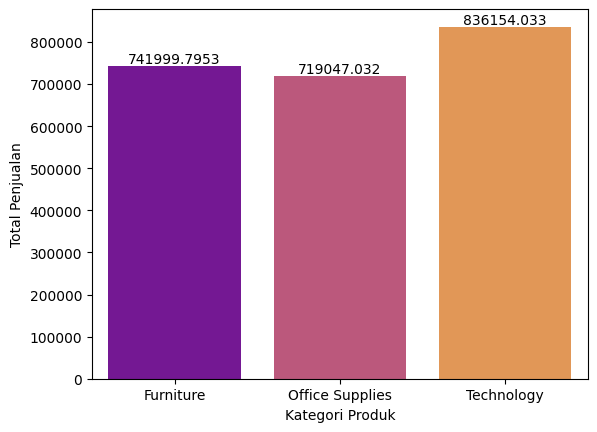

In [15]:
# Mengelompokkan data berdasarkan kategori produk dan menjumlahkan kolom penjualan
sales_by_category = df_order.groupby('Category')['Sales'].sum()

# Menampilkan total penjualan untuk setiap kategori produk
print(sales_by_category)

# Membuat plot menggunakan seaborn
sns.barplot(
    x=sales_by_category.index,
    y=sales_by_category.values,
    hue=sales_by_category.index,
    palette='plasma'
)

# Menambahkan label pada barplot
for index, value in enumerate(sales_by_category.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')
plt.show()


- Berapa total keuntungan yang dihasilkan dari penjualan di wilayah Selatan?

In [16]:
print(df_order.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Country/Region', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')


In [17]:
print(df_customer.columns)

Index(['Customer ID', 'Customer Name', 'Segment', 'City', 'State'], dtype='object')


In [18]:
subset = df_order[['Profit','Region']]
subset.head()

,Profit,Region
0,41.9136,South
1,219.5820,South
2,6.8714,West
3,-383.0310,South
4,2.5164,South


In [19]:
subset_south = subset[subset['Region']=='South']
subset_south.head()

,Profit,Region
0,41.9136,South
1,219.5820,South
3,-383.0310,South
4,2.5164,South
12,5.4432,South


In [20]:
total_profit = subset_south['Profit'].sum()
print('Jumlah Total Profit wilayah selatan =', total_profit)

Jumlah Total Profit wilayah selatan = 46749.43029999999


- Berapa persentase perbandingan total keuntungan yang dihasilkan dari semua wilayah?

In [21]:
total_profit_by_region = subset.groupby('Region')['Profit'].sum()
total_profit_by_region

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

In [22]:
total_profit_all_regions = total_profit_by_region.sum()

# Menghitung persentase profit di setiap wilayah
percentage_profit_per_region = (total_profit_by_region / total_profit_all_regions) * 100
percentage_profit_per_region

Region
Central    13.864098
East       31.956610
South      16.323295
West       37.855997
Name: Profit, dtype: float64

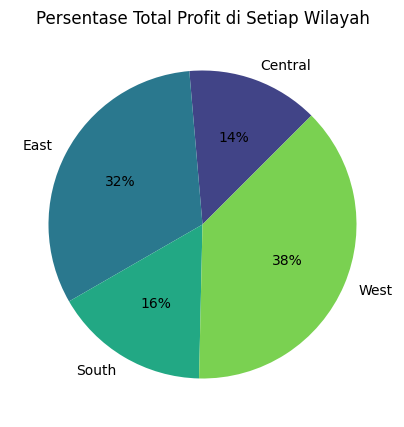

In [23]:
plt.figure(figsize=(5, 5))
pallete = sns.color_palette("viridis", len(percentage_profit_per_region))
plt.pie(
    percentage_profit_per_region,
    labels=percentage_profit_per_region.index,
    autopct='%.0f%%',
    startangle=45,
    colors=pallete)
plt.title('Persentase Total Profit di Setiap Wilayah')
plt.show()

- Bagaimana pertumbuhan penjualan dari tahun ke tahun, apakah ada peningkatan atau penurunan yang signifikan?

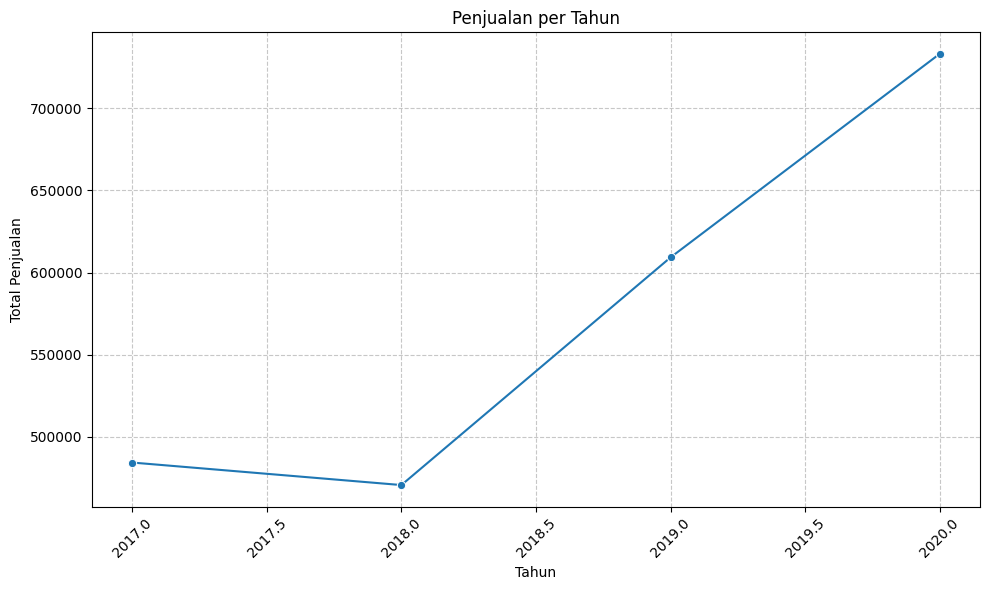

In [24]:
# Merubah Order Date ke dalam format date time
df_order['Order Date'] = pd.to_datetime(df_order['Order Date'])

# Ekstrak tahun dari kolom Order Date
df_order['Year'] = df_order['Order Date'].dt.year

# Kelompokkan berdasarkan tahun dan hitung jumlah penjualan
sales_per_year = df_order.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=sales_per_year,
    x='Year',
    y='Sales',
    marker='o')
plt.title('Penjualan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Adakah bulan yang menunjukkan penurunan signifikan dalam penjualan di tahun 2018?

C:\Users\Admin\AppData\Local\Temp\ipykernel_9848\1517958405.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_2018['Month'] = df_order_2018['Order Date'].dt.month


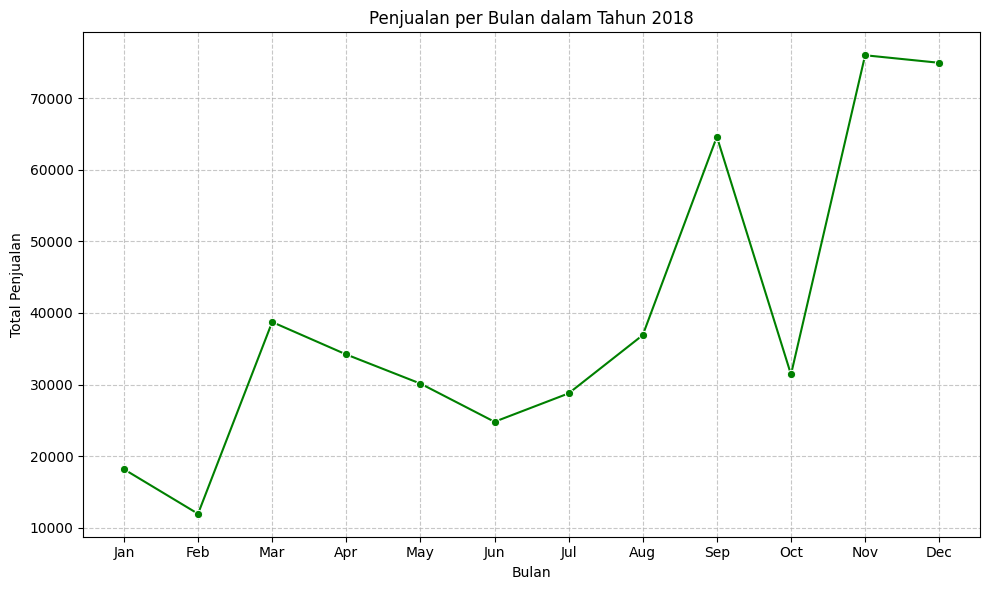

In [25]:
# Konversi kolom Order Date ke format datetime
df_order['Order Date'] = pd.to_datetime(df_order['Order Date'])

# Filter data tahun 2018
df_order_2018 = df_order[df_order['Order Date'].dt.year == 2018]

# Ekstrak bulan dari kolom "Order Date"
df_order_2018['Month'] = df_order_2018['Order Date'].dt.month

# Kelompokkan berdasarkan bulan dan hitung jumlah penjualan
sales_per_month_2018 = df_order_2018.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_per_month_2018, x='Month', y='Sales', marker='o', color='green')
plt.title('Penjualan per Bulan dalam Tahun 2018')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### b. Pelanggan

- Siapa pelanggan yang melakukan pembelian tertinggi dan detail pembelian mereka apa saja?

In [26]:
join_df = df_order.join(df_customer.set_index('Customer ID'),on='Customer ID', how='inner')
join_df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,Postal Code,Region,Product ID,...,Product Name,Sales,Quantity,Discount,Profit,Year,Customer Name,Segment,City,State
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,42420,South,FUR-BO-10001798,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2019,Claire Gute,Consumer,Henderson,Kentucky
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,42420,South,FUR-BO-10001798,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2019,Claire Gute,Consumer,Houston,Texas
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,42420,South,FUR-BO-10001798,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2019,Claire Gute,Consumer,Dallas,Texas


In [27]:
print(join_df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Country/Region', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Year', 'Customer Name', 'Segment', 'City',
       'State'],
      dtype='object')


In [28]:
customer_sales = join_df.groupby('Customer Name')['Sales'].sum()
customer_sales.head()

Customer Name
Aaron Bergman       2658.468
Aaron Hawkins      10468.200
Aaron Smayling     21354.844
Adam Bellavance    62044.960
Adam Hart          32503.370
Name: Sales, dtype: float64

In [29]:
top_customer = customer_sales.idxmax()
top_customer_sales = customer_sales.max()

# Memfilter detail pembelian untuk pelanggan tertinggi
top_customer_details = join_df[join_df['Customer Name'] == top_customer]

# Menampilkan hasil
print('Pelanggan dengan total penjualan tertinggi:')
print('Nama Pelanggan:', top_customer)
print('Total Pembelian:', top_customer_sales)

Pelanggan dengan total penjualan tertinggi:
Nama Pelanggan: Ken Lonsdale
Total Pembelian: 141752.29


In [30]:
unique_data = top_customer_details[['Customer Name', 'Product Name']].drop_duplicates()
print(unique_data)

     Customer Name                                       Product Name
237   Ken Lonsdale                                         Xerox 1957
238   Ken Lonsdale  Luxo Professional Fluorescent Magnifier Lamp w...
239   Ken Lonsdale                         Staple-based wall hangings
240   Ken Lonsdale                  PureGear Roll-On Screen Protector
241   Ken Lonsdale                               KI Conference Tables
242   Ken Lonsdale                   Eldon 100 Class Desk Accessories
243   Ken Lonsdale  Binney & Smith Crayola Metallic Colored Pencil...
339   Ken Lonsdale       OIC Binder Clips, Mini, 1/4" Capacity, Black
1444  Ken Lonsdale                       Mitel MiVoice 5330e IP Phone
2504  Ken Lonsdale       Fellowes Personal Hanging Folder Files, Navy
2505  Ken Lonsdale        High Speed Automatic Electric Letter Opener
2735  Ken Lonsdale                                     BlackBerry Q10
2736  Ken Lonsdale        Adams Telephone Message Books, 5 1/4” x 11”
2737  Ken Lonsdale  

- Di antara pelanggan yang terdaftar, siapa yang melakukan pembelian terbanyak (dilihat dari jumlah barang yang dibeli) dan detail pembelian mereka apa saja?

In [31]:
customer_sales_count = join_df.groupby('Customer Name')['Sales'].count()
customer_sales_count.head()

Customer Name
Aaron Bergman       18
Aaron Hawkins       66
Aaron Smayling      70
Adam Bellavance    144
Adam Hart          200
Name: Sales, dtype: int64

In [32]:
customer_sales_count = customer_sales_count.rename('Purchased Item').reset_index()
customer_sales_count.head(20)

,Customer Name,Purchased Item
0,Aaron Bergman,18
1,Aaron Hawkins,66
2,Aaron Smayling,70
3,Adam Bellavance,144
4,Adam Hart,200
5,Adam Shillingsburg,175
6,Adrian Barton,180
7,Adrian Hane,112
8,Adrian Shami,6
9,Aimee Bixby,60


In [33]:
top_5_customers = customer_sales_count.sort_values(by='Purchased Item', ascending=False).head(5)
top_5_customers

,Customer Name,Purchased Item
259,Emily Phan,465
791,Zuschuss Carroll,372
145,Chloris Kastensmidt,352
595,Paul Prost,340
787,William Brown,333


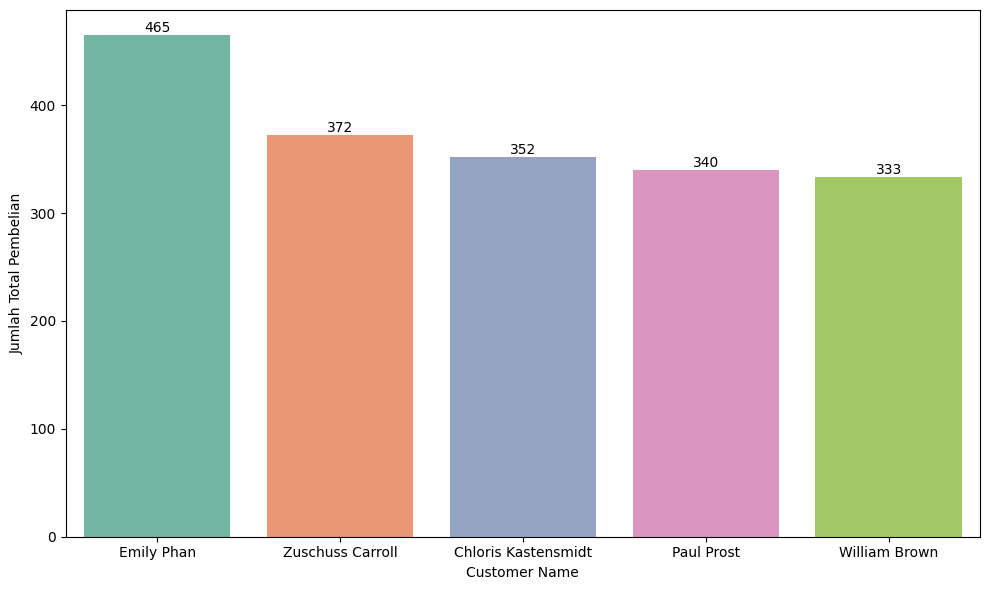

In [34]:
top_5_customers = customer_sales_count.sort_values(by='Purchased Item', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Customer Name',
    y='Purchased Item',
    data=top_5_customers,
    hue='Customer Name',
    palette='Set2'
)
plt.xticks(rotation=360, ha='center')
plt.xlabel('Customer Name')
plt.ylabel('Jumlah Total Pembelian')

for index, value in enumerate(top_5_customers['Purchased Item']):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


- Bagaimana distribusi segmen pelanggan dalam data?

In [35]:
segment_distribution = join_df['Segment'].value_counts()

print("Distribusi Segmen Pelanggan:")
print(segment_distribution)

Distribusi Segmen Pelanggan:
Segment
Consumer       35312
Corporate      20987
Home Office    11841
Name: count, dtype: int64


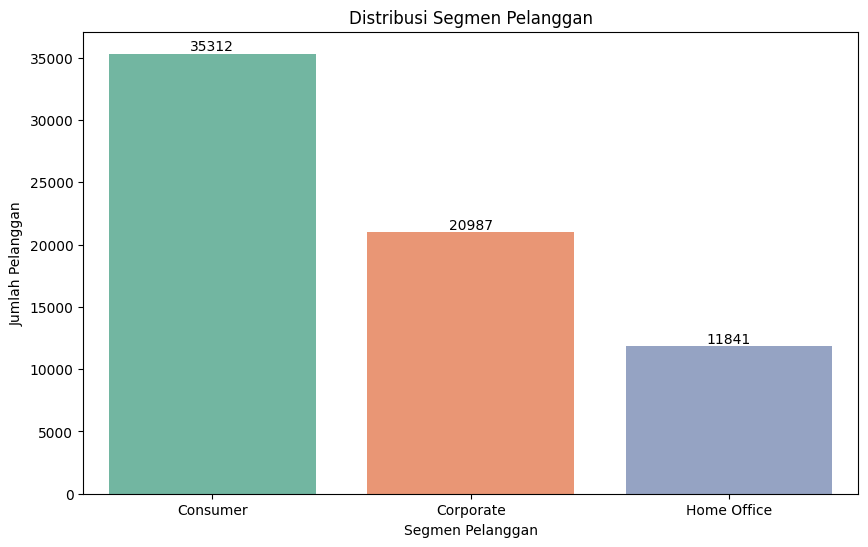

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=join_df, x='Segment', palette='Set2', hue='Segment')
plt.title('Distribusi Segmen Pelanggan')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(ha='center')

for index, value in enumerate(join_df['Segment'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

### c. Metode Pengiriman

- Berapa jumlah pesanan yang dikirim menggunakan metode pengiriman "Second Class"?

In [37]:
df_order.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Country/Region', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Year'],
      dtype='object')

In [38]:
df_customer.columns

Index(['Customer ID', 'Customer Name', 'Segment', 'City', 'State'], dtype='object')

In [39]:
ship_mode = join_df[['Ship Mode','Sales']]
ship_mode

,Ship Mode,Sales
0,Second Class,261.960
0,Second Class,261.960
0,Second Class,261.960
1,Second Class,731.940
1,Second Class,731.940
...,...,...
9559,First Class,195.640
9560,First Class,51.968
9561,First Class,431.976
9562,First Class,224.937


In [40]:
subset_ship_mode = ship_mode[ship_mode['Ship Mode']=='Second Class']
subset_ship_mode


,Ship Mode,Sales
0,Second Class,261.96
0,Second Class,261.96
0,Second Class,261.96
1,Second Class,731.94
1,Second Class,731.94
...,...,...
9209,Second Class,7.28
9209,Second Class,7.28
9210,Second Class,5.40
9210,Second Class,5.40


In [41]:
count_ship_mode = subset_ship_mode['Ship Mode'].count()
print('Jumlah total pengiriman menggunakan Second Class:', count_ship_mode)

Jumlah total pengiriman menggunakan Second Class: 13072


In [42]:
count_all_ship = join_df['Ship Mode'].value_counts()
count_all_ship

Ship Mode
Standard Class    40997
Second Class      13072
First Class       10320
Same Day           3751
Name: count, dtype: int64

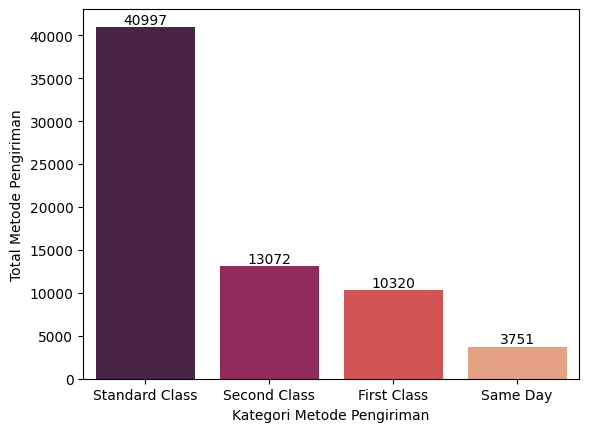

In [43]:
sns.barplot(
    x=count_all_ship.index,
    y=count_all_ship.values,
    hue=count_all_ship.index,
    palette='rocket'
)

# Menambahkan label pada barplot
for index, value in enumerate(count_all_ship.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Kategori Metode Pengiriman')
plt.ylabel('Total Metode Pengiriman')
plt.show()

### d. Diskon dan Keuntungan

In [44]:
df_order.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Country/Region', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Year'],
      dtype='object')

- Berapa persentase diskon rata-rata yang diberikan untuk setiap kategori produk?

In [45]:
disc_by_category = df_order[['Discount','Category']]
disc_by_category.head()

,Discount,Category
0,0.00,Furniture
1,0.00,Furniture
2,0.00,Office Supplies
3,0.45,Furniture
4,0.20,Office Supplies


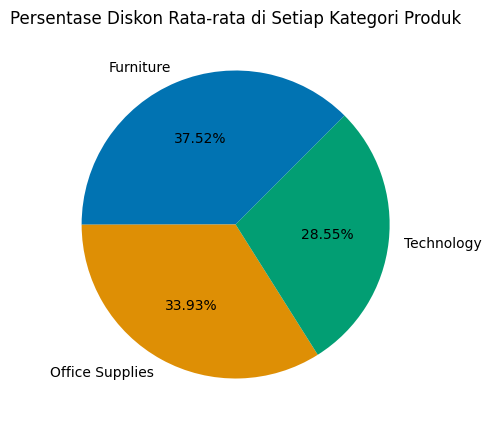

In [47]:
# Menghitung diskon rata-rata untuk setiap kategori produk
avg_disc_by_category = df_order.groupby('Category')['Discount'].mean()

# Normalisasi persentase agar totalnya adalah 100%
total_percentage = avg_disc_by_category.sum()
percentage_disc_by_category = (avg_disc_by_category / total_percentage) * 100

plt.figure(figsize=(5, 5))
palette = sns.color_palette("colorblind", len(percentage_disc_by_category))
plt.pie(
    percentage_disc_by_category,
    labels=percentage_disc_by_category.index,
    autopct='%0.2f%%',
    startangle=45,
    colors=palette)
plt.title('Persentase Diskon Rata-rata di Setiap Kategori Produk')
plt.show()


- Kategori produk mana yang memiliki margin keuntungan rata-rata tertinggi?

### e. Produk

- Berapa total kuantitas yang terjual untuk setiap sub-kategori produk?

- Apakah ada kategori produk tertentu yang mendominasi penjualan? Bagaimana distribusi penjualan di antara sub-kategori produk?

# 9. Conclusion & Recommendation

In [48]:
# db = mysql.connector.connect(
#     host = 'localhost',
#     user = 'root', 
#     password = '',
#     database = 'tutorial1'
#     )

# if db.is_connected():
#     print('berhasil')



# cursor = db.cursor()
# cursor.execute('create database tutorial1')
# print('db berhasil dibuat')



# cursor.execute('create table if not exists cleaned_text(id integer primary key autoincrement, text text)')